In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df = pd.read_csv('stock_us_cleaned.csv')

In [38]:
df.rename(columns={'All High 52W':'AH_52W', 'All Low 52W':'AL_52W', 'Basic EPS Q2':'EPS_Q2', 'Basic EPS PQ':'EPS_PQ',
                  'Basic EPS Q3':'EPS_Q3', 'Percentage Change Price Q3-Q2':'PCP_Q3Q2',
                  'Percentage Change Price Q2-PQ':'PCP_Q2PQ', 'growth_rate_revenue_Q3_to_Q2':'revenue_Q3Q2',
                  'growth_rate_revenue_Q2_to_PQ':'revenue_Q2PQ', 'growth_rate_revenue_Q2PQ_compare_Q3Q2':'revenue_Q2PQ_Q3Q2',
                  'growth_rate_net_income_Q3_to_Q2':'net_income_Q3Q2', 'growth_rate_net_income_Q2_to_PQ':'net_income_Q2PQ',
                  'growth_rate_net_income_Q2PQ_compare_Q3Q2':'net_income_Q2PQ_Q3Q2', 'growth_change_EPS_Q3_to_Q2':'EPS_Q3Q2',
                  'growth_change_EPS_Q2_to_PQ':'EPS_Q2PQ', 'growth_change_EPS_Q2PQ_compare_Q3Q2':'EPS_Q2PQ_Q3Q2',
                  'growth_change_ROE_Q3_to_Q2':'ROE_Q3Q2',
                  'growth_change_ROE_Q2_to_PQ':'ROE_Q2PQ', 'growth_change_ROE_Q2PQ_compare_Q3Q2':'ROE_Q2PQ_Q3Q2', 
                  'Highest Price in Next Quarter':'highest_price',
                  'Lowest Price in Next Quarter':'lowest_price'}, inplace=True)
df['AH_52W'] = abs(df['AH_52W'])

In [39]:
#remove all the outliers from all columns
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

[Text(0, 0, 'EPS_Q3'),
 Text(1, 0, 'EPS_Q2'),
 Text(2, 0, 'EPS_PQ'),
 Text(3, 0, 'AH_52W'),
 Text(4, 0, 'AL_52W'),
 Text(5, 0, 'RSI_Q3'),
 Text(6, 0, 'RSI_Q2'),
 Text(7, 0, 'RSI_PQ'),
 Text(8, 0, 'PCP_Q3Q2'),
 Text(9, 0, 'PCP_Q2PQ'),
 Text(10, 0, 'revenue_Q3Q2'),
 Text(11, 0, 'revenue_Q2PQ'),
 Text(12, 0, 'revenue_Q2PQ_Q3Q2'),
 Text(13, 0, 'net_income_Q3Q2'),
 Text(14, 0, 'net_income_Q2PQ'),
 Text(15, 0, 'net_income_Q2PQ_Q3Q2'),
 Text(16, 0, 'EPS_Q3Q2'),
 Text(17, 0, 'EPS_Q2PQ'),
 Text(18, 0, 'EPS_Q2PQ_Q3Q2'),
 Text(19, 0, 'ROE_Q3Q2'),
 Text(20, 0, 'ROE_Q2PQ'),
 Text(21, 0, 'ROE_Q2PQ_Q3Q2'),
 Text(22, 0, 'RSI_Q3Q2'),
 Text(23, 0, 'RSI_Q2PQ'),
 Text(24, 0, 'RSI_Q2PQ_Q3Q2'),
 Text(25, 0, 'highest_price'),
 Text(26, 0, 'lowest_price')]

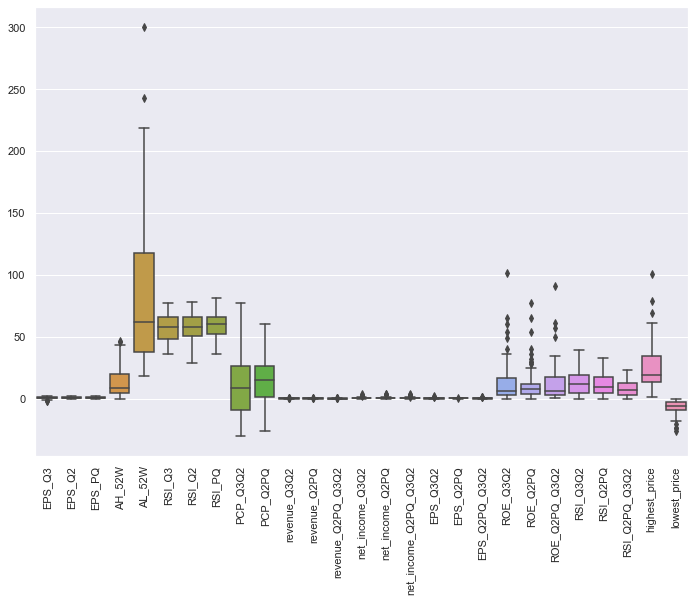

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [41]:
#correlation between the absolute percentage change in price from Q3 to Q2 / Q2 to PQ with 
#highest price / lowest price in the next quarter
df['PCP_Q2PQ'] = abs(df['PCP_Q2PQ'])
df['PCP_Q3Q2'] = abs(df['PCP_Q3Q2'])
df['PCP_PQQ2_Q3Q2'] = abs(df['PCP_Q2PQ'] - df['PCP_Q3Q2'])
df[['PCP_Q3Q2', 'PCP_Q2PQ', 'PCP_PQQ2_Q3Q2', 'highest_price', 'lowest_price']].corr()

,PCP_Q3Q2,PCP_Q2PQ,PCP_PQQ2_Q3Q2,highest_price,lowest_price
PCP_Q3Q2,1.000000,0.245036,0.481194,0.400456,-0.141605
PCP_Q2PQ,0.245036,1.000000,0.115434,0.235646,0.057557
PCP_PQQ2_Q3Q2,0.481194,0.115434,1.000000,0.392825,-0.144220
highest_price,0.400456,0.235646,0.392825,1.000000,0.309535
lowest_price,-0.141605,0.057557,-0.144220,0.309535,1.000000


In [42]:
df.columns

Index(['EPS_Q3', 'EPS_Q2', 'EPS_PQ', 'AH_52W', 'AL_52W', 'RSI_Q3', 'RSI_Q2',
       'RSI_PQ', 'PCP_Q3Q2', 'PCP_Q2PQ', 'revenue_Q3Q2', 'revenue_Q2PQ',
       'revenue_Q2PQ_Q3Q2', 'net_income_Q3Q2', 'net_income_Q2PQ',
       'net_income_Q2PQ_Q3Q2', 'EPS_Q3Q2', 'EPS_Q2PQ', 'EPS_Q2PQ_Q3Q2',
       'ROE_Q3Q2', 'ROE_Q2PQ', 'ROE_Q2PQ_Q3Q2', 'RSI_Q3Q2', 'RSI_Q2PQ',
       'RSI_Q2PQ_Q3Q2', 'highest_price', 'lowest_price', 'PCP_PQQ2_Q3Q2'],
      dtype='object')

In [43]:
#correlation between the highest price and other elements
df[['EPS_Q3', 'EPS_Q2', 'EPS_PQ', 'AH_52W', 'AL_52W', 'RSI_Q3', 'RSI_Q2',
       'RSI_PQ', 'PCP_Q3Q2', 'PCP_Q2PQ', 'revenue_Q3Q2', 'revenue_Q2PQ',
       'revenue_Q2PQ_Q3Q2', 'net_income_Q3Q2', 'net_income_Q2PQ',
       'net_income_Q2PQ_Q3Q2', 'EPS_Q3Q2', 'EPS_Q2PQ', 'EPS_Q2PQ_Q3Q2',
       'ROE_Q3Q2', 'ROE_Q2PQ', 'ROE_Q2PQ_Q3Q2', 'RSI_Q3Q2', 'RSI_Q2PQ',
       'RSI_Q2PQ_Q3Q2', 'PCP_PQQ2_Q3Q2']].corrwith(df['highest_price']).abs().sort_values(ascending=False)

EPS_PQ                  0.435663
AH_52W                  0.435270
EPS_Q2                  0.409113
PCP_Q3Q2                0.400456
EPS_Q3                  0.395127
PCP_PQQ2_Q3Q2           0.392825
revenue_Q2PQ_Q3Q2       0.335416
revenue_Q3Q2            0.313744
AL_52W                  0.266760
RSI_Q3                  0.247962
PCP_Q2PQ                0.235646
revenue_Q2PQ            0.176187
RSI_PQ                  0.175338
RSI_Q2PQ                0.169177
RSI_Q2                  0.096798
RSI_Q2PQ_Q3Q2           0.074103
EPS_Q2PQ_Q3Q2           0.066968
net_income_Q3Q2         0.064549
net_income_Q2PQ         0.058893
RSI_Q3Q2                0.056635
ROE_Q2PQ                0.042526
ROE_Q2PQ_Q3Q2           0.042233
net_income_Q2PQ_Q3Q2    0.027434
ROE_Q3Q2                0.010165
EPS_Q3Q2                0.007011
EPS_Q2PQ                0.001483
dtype: float64

Text(0.5, 1.0, 'the highest price vs indicator')

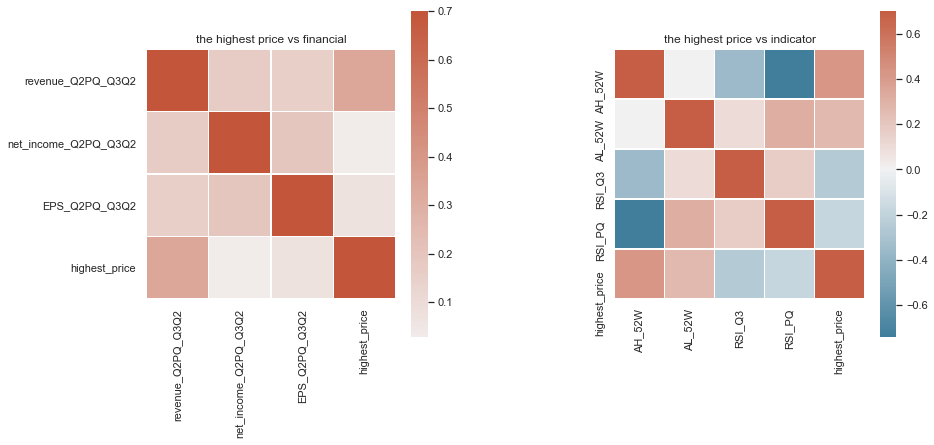

In [44]:
#visualize the correlation between the highest price and other elements with heatmap
corr_financial = df[['revenue_Q2PQ_Q3Q2', 'net_income_Q2PQ_Q3Q2', 'EPS_Q2PQ_Q3Q2', 'highest_price']].corr()

corr_indicator = df[['AH_52W', 'AL_52W', 'RSI_Q3', 'RSI_PQ', 'highest_price']].corr()

f, axes = plt.subplots(1, 2, figsize = (14,12))
plt.subplots_adjust(wspace=0.5)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_financial, cmap=cmap, vmin=None, vmax=0.7, center=0, ax=axes[0],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr_indicator, cmap=cmap, vmin=None, vmax=0.7, center=0, ax=axes[1],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

axes[0].set_title('the highest price vs financial')
axes[1].set_title('the highest price vs indicator')

In [45]:
#correlation between the lowest price and other elements
df[['EPS_Q3', 'EPS_Q2', 'EPS_PQ', 'AH_52W', 'AL_52W', 'RSI_Q3', 'RSI_Q2',
       'RSI_PQ', 'PCP_Q3Q2', 'PCP_Q2PQ', 'revenue_Q3Q2', 'revenue_Q2PQ',
       'revenue_Q2PQ_Q3Q2', 'net_income_Q3Q2', 'net_income_Q2PQ',
       'net_income_Q2PQ_Q3Q2', 'EPS_Q3Q2', 'EPS_Q2PQ', 'EPS_Q2PQ_Q3Q2',
       'ROE_Q3Q2', 'ROE_Q2PQ', 'ROE_Q2PQ_Q3Q2', 'RSI_Q3Q2', 'RSI_Q2PQ',
       'RSI_Q2PQ_Q3Q2', 'PCP_PQQ2_Q3Q2']].corrwith(df['lowest_price']).abs().sort_values(ascending=False)

net_income_Q3Q2         0.367233
EPS_PQ                  0.297816
RSI_PQ                  0.278603
EPS_Q3                  0.263323
EPS_Q2                  0.244818
AH_52W                  0.197686
RSI_Q2                  0.189162
net_income_Q2PQ_Q3Q2    0.168948
RSI_Q2PQ                0.153914
RSI_Q2PQ_Q3Q2           0.144506
PCP_PQQ2_Q3Q2           0.144220
PCP_Q3Q2                0.141605
ROE_Q2PQ                0.140967
revenue_Q2PQ            0.124576
ROE_Q3Q2                0.117844
RSI_Q3Q2                0.098989
RSI_Q3                  0.092211
revenue_Q3Q2            0.080984
EPS_Q3Q2                0.080815
EPS_Q2PQ                0.060790
PCP_Q2PQ                0.057557
net_income_Q2PQ         0.048364
EPS_Q2PQ_Q3Q2           0.034574
AL_52W                  0.034221
ROE_Q2PQ_Q3Q2           0.006829
revenue_Q2PQ_Q3Q2       0.005745
dtype: float64

Text(0.5, 1.0, 'the lowest price vs indicator')

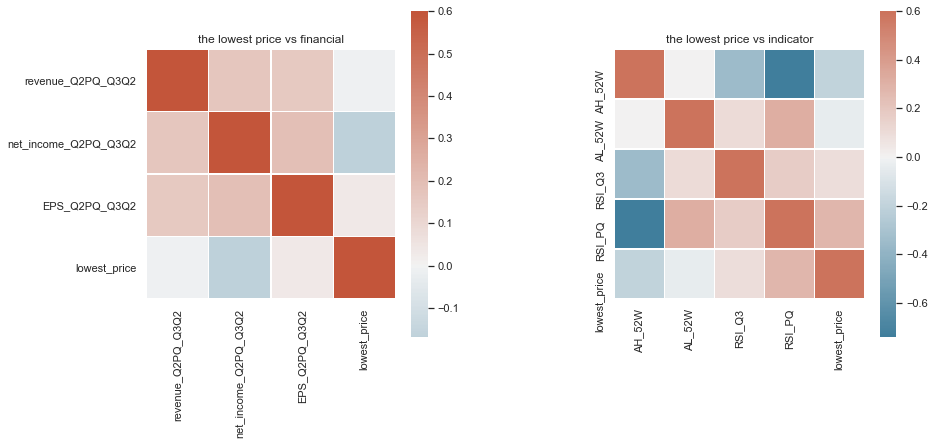

In [46]:
#visualize the correlation between the lowest price and other elements with heatmap
corr_financial = df[['revenue_Q2PQ_Q3Q2', 'net_income_Q2PQ_Q3Q2', 'EPS_Q2PQ_Q3Q2', 'lowest_price']].corr()

corr_indicator = df[['AH_52W', 'AL_52W', 'RSI_Q3', 'RSI_PQ', 'lowest_price']].corr()

f, axes = plt.subplots(1, 2, figsize = (14,12))
plt.subplots_adjust(wspace=0.5)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_financial, cmap=cmap, vmin=None, vmax=0.6, center=0, ax=axes[0],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr_indicator, cmap=cmap, vmin=None, vmax=0.6, center=0, ax=axes[1],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

axes[0].set_title('the lowest price vs financial')
axes[1].set_title('the lowest price vs indicator')

In [47]:
df_out_highest_price = df[['AH_52W', 'EPS_Q3', 'EPS_Q2', 'EPS_PQ', 'PCP_PQQ2_Q3Q2', 'PCP_Q3Q2', 'highest_price']]
df_out_lowsest_price = df[['EPS_PQ', 'EPS_Q3','net_income_Q3Q2', 'RSI_PQ', 'lowest_price']]

df_out_highest_price.to_csv('highest_price_EDA.csv', index=False)
df_out_lowsest_price.to_csv('lowest_price_EDA.csv', index=False)